<a href="https://colab.research.google.com/github/tanvirathore36-DS/FUTURE_DS_03/blob/main/notebooks/01_data_cleaning_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 01_Data_Cleaning_and_EDA

This notebook performs data loading, cleaning, and exploratory data analysis (EDA) for the **College Event Feedback** dataset from Task 3 (Future Interns – Data Science & Analytics Internship).

In [2]:
# === Cell A: Imports + inline plotting ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("ggplot")
sns.set_palette("pastel")

print("Libraries loaded OK")


Libraries loaded OK


In [3]:
# === Cell B: Upload and load the CSV (interactive in Colab) ===
from google.colab import files
uploaded = files.upload()   # click to upload student_feedback.csv

# take the first (and expected) uploaded file
filename = next(iter(uploaded.keys()))
print("Uploaded file:", filename)

df = pd.read_csv(filename)
print("Loaded into df with shape:", df.shape)
display(df.head(3))


Saving student_feedback.csv to student_feedback.csv
Uploaded file: student_feedback.csv
Loaded into df with shape: (1001, 10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1


In [4]:
print(df.shape)
print(df.columns.tolist())



(1001, 10)
['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


In [5]:
# === Cell C: Check data info and missing values ===
df.info()
print("\nMissing values per column:\n")
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [6]:
# === Cell D: Basic cleaning ===

# Drop the unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing values (fill numeric with median)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# For text columns (if any), fill with mode (most common value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Data cleaned successfully!")
print("New shape:", df.shape)
df.head(2)


✅ Data cleaned successfully!
New shape: (1001, 9)


/tmp/ipython-input-3862050828.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9


In [7]:
# === Cell E: Verify columns ===
print("Columns after cleaning:")
print(df.columns.tolist())


Columns after cleaning:
['Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


In [8]:
# === Cell F: Identify rating columns ===
rating_cols = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

print("Total rating columns:", len(rating_cols))
print("First 3 columns:", rating_cols[:3])


Total rating columns: 8
First 3 columns: ['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations']


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


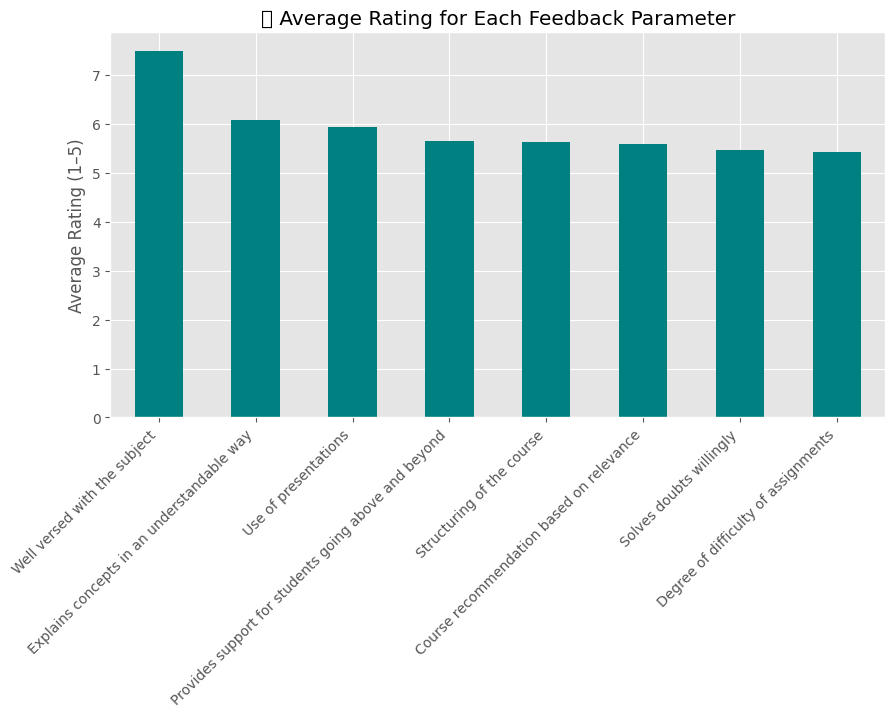

In [9]:
# === Cell G: Average rating chart ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
df[rating_cols].mean().sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("📊 Average Rating for Each Feedback Parameter")
plt.ylabel("Average Rating (1–5)")
plt.xticks(rotation=45, ha='right')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


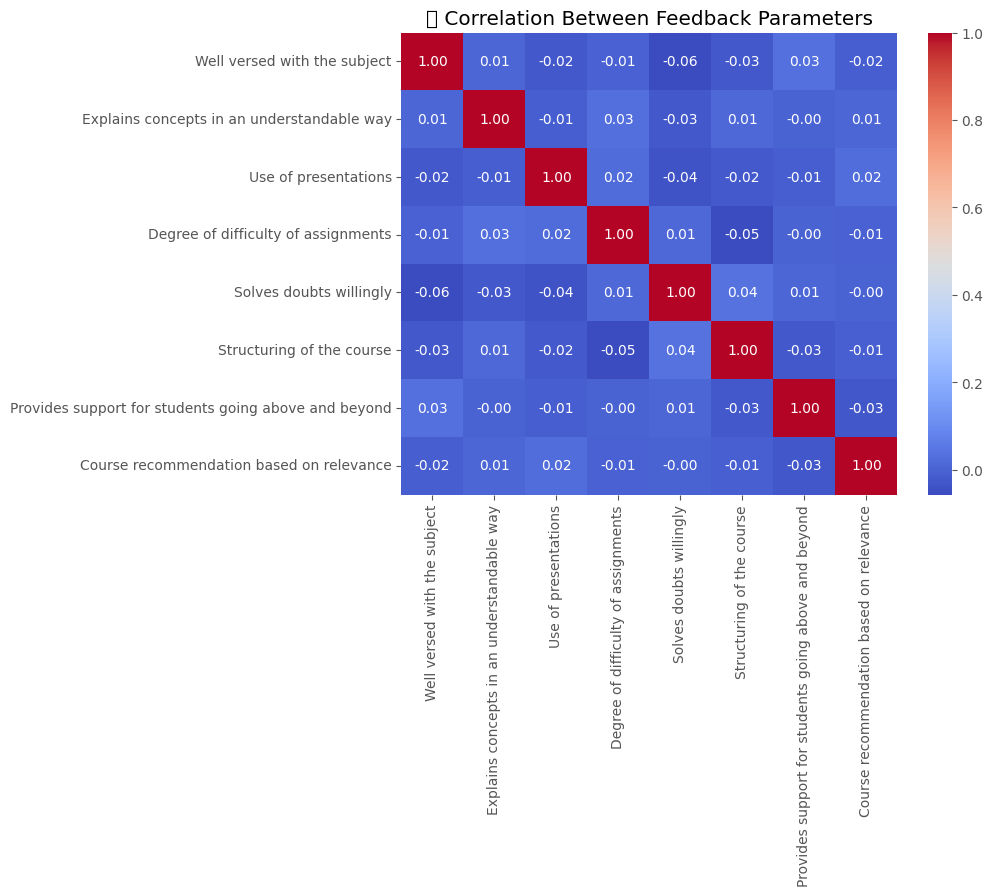

In [10]:
# === Cell H: Correlation Heatmap ===
plt.figure(figsize=(8,6))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔗 Correlation Between Feedback Parameters")
plt.show()


In [11]:
# === Cell I: Top & Bottom Rated Aspects ===
avg_scores = df[rating_cols].mean().sort_values(ascending=False)
print("🏆 Top 3 Rated Aspects:")
print(avg_scores.head(3))
print("\n⚠️ Lowest 3 Rated Aspects:")
print(avg_scores.tail(3))


🏆 Top 3 Rated Aspects:
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

⚠️ Lowest 3 Rated Aspects:
Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


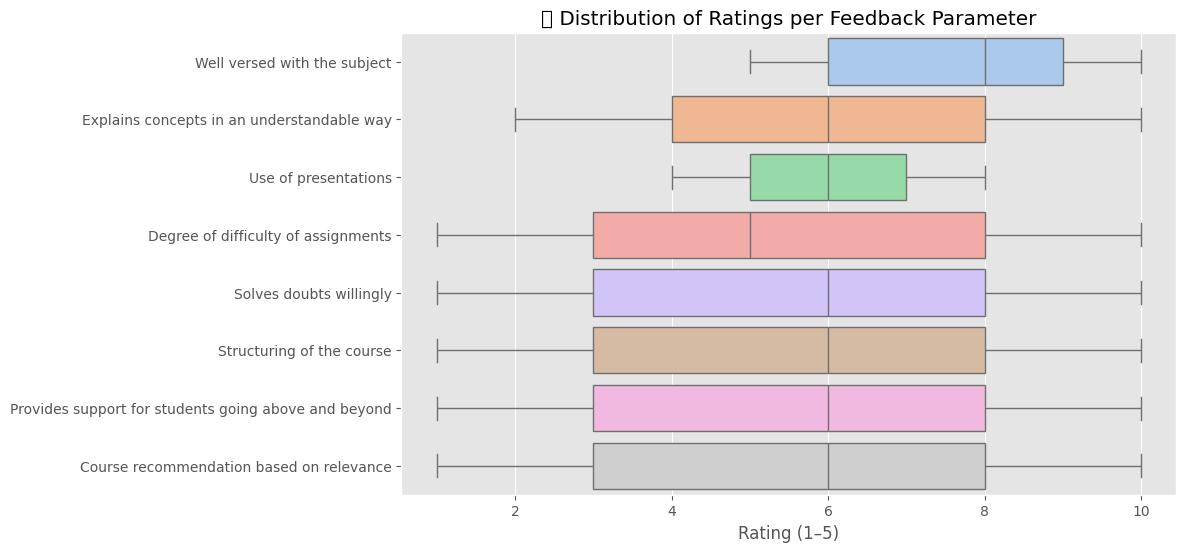

In [12]:
# === Cell J: Boxplot for distribution ===
plt.figure(figsize=(10,6))
sns.boxplot(data=df[rating_cols], orient='h', palette='pastel')
plt.title("📦 Distribution of Ratings per Feedback Parameter")
plt.xlabel("Rating (1–5)")
plt.show()


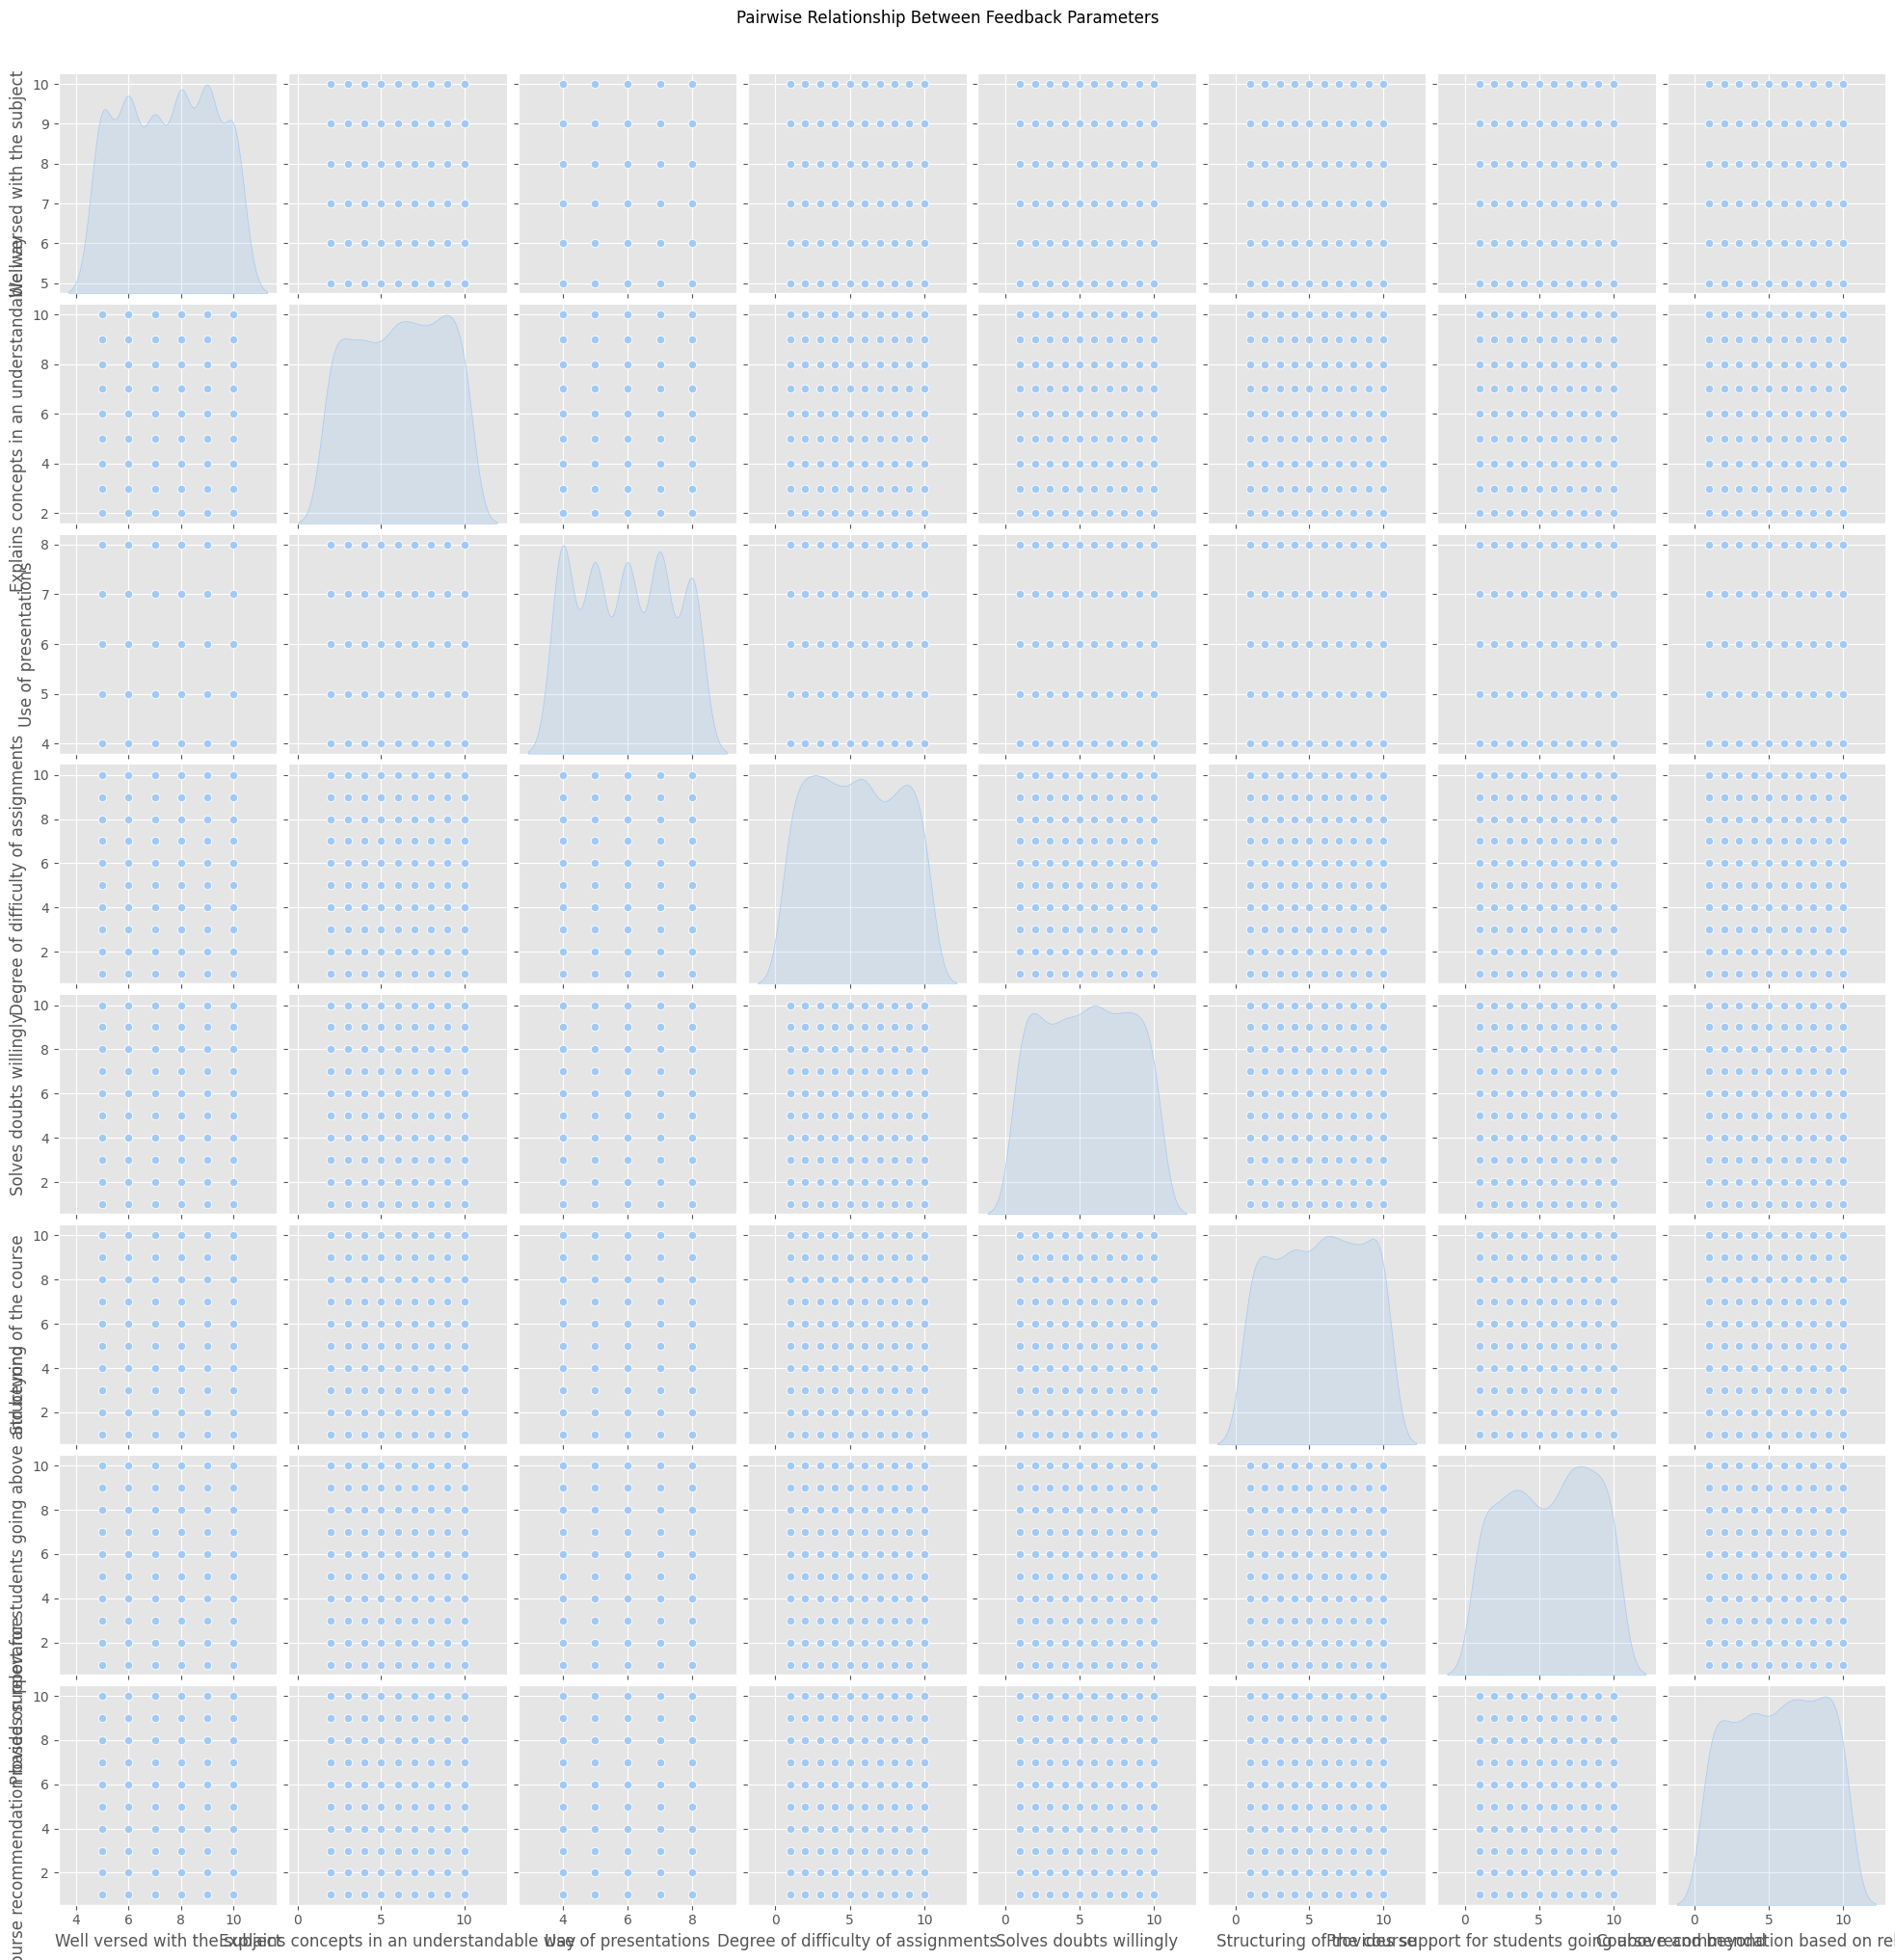

In [13]:
sns.pairplot(df[rating_cols], diag_kind='kde')
plt.suptitle("Pairwise Relationship Between Feedback Parameters", y=1.02)
plt.show()


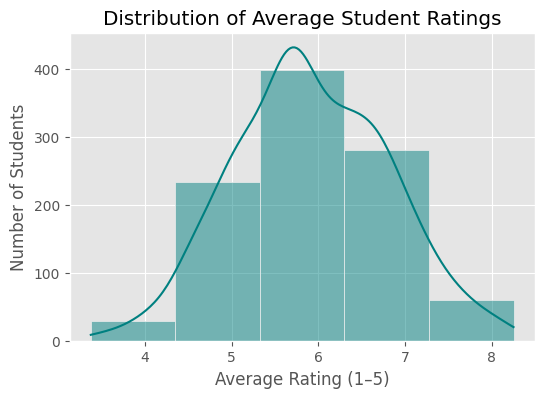

In [14]:
df['Average_Rating'] = df[rating_cols].mean(axis=1)

plt.figure(figsize=(6,4))
sns.histplot(df['Average_Rating'], bins=5, kde=True, color='teal')
plt.title("Distribution of Average Student Ratings")
plt.xlabel("Average Rating (1–5)")
plt.ylabel("Number of Students")
plt.show()


In [15]:
# === Cell K: Save cleaned dataset ===
df.to_csv("student_feedback_cleaned.csv", index=False)
print("✅ Cleaned feedback data saved successfully!")


✅ Cleaned feedback data saved successfully!
